<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/Hotel_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries and dataset

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


In [5]:
df.head()

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0


In [14]:
df.tail()

,Unnamed: 0,content,translated_content,priority_score,problem_domain
695,696,Mohon yang bersihin kamar mandi laki2 khusus l...,Please clean the men's bathrooms specifically ...,2,0
696,697,Kurang kedap suara. Kebangun gara2 pod sebelah...,Loading...,2,0
697,698,Would be nice if people could leave luggage af...,Would be nice if people could leave luggage af...,2,0
698,699,Matrasnya ternyata keras bgt\nDiluar itu so fa...,The mattress turned out to be really hard\nApa...,2,0
699,700,"Toiletnya bau, tolong disediakan air mineral k...",Loading...,2,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
priority_score,700.0,2.184286,0.757629,1.0,2.00,2.0,3.00,3.0
problem_domain,700.0,0.185714,0.389154,0.0,0.00,0.0,0.00,1.0


In [16]:
df.describe(include="object").T

,count,unique,top,freq
content,700,697,Ok,3
translated_content,700,408,Loading...,292


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
content,0
translated_content,0
priority_score,0
problem_domain,0


In [17]:
df.duplicated().sum()

0

Data Preprocessing

In [18]:
df.head(2)

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1


In [19]:
df.drop(["Unnamed: 0", "content"], axis = 1, inplace=True)

In [ ]:
df

,translated_content,priority_score,problem_domain
0,"Sorry, including the expensive price + apk usi...",2,0
1,"After installed, the app stuck with white display",3,1
2,"Cannot submit the data verification, even my i...",3,1
3,The app keep restarting,3,1
4,"Overpriced, bad food, too many flies",2,0
...,...,...,...
695,Please clean the men's bathrooms specifically ...,2,0
696,Loading...,2,0
697,Would be nice if people could leave luggage af...,2,0
698,The mattress turned out to be really hard\nApa...,2,0


In [20]:
df.head(2)

,translated_content,priority_score,problem_domain
0,"Sorry, including the expensive price + apk usi...",2,0
1,"After installed, the app stuck with white display",3,1


Conversion of all letters to lower case

In [21]:
df["translated_content"] = df["translated_content"].str.lower()


In [22]:
df


,translated_content,priority_score,problem_domain
0,"sorry, including the expensive price + apk usi...",2,0
1,"after installed, the app stuck with white display",3,1
2,"cannot submit the data verification, even my i...",3,1
3,the app keep restarting,3,1
4,"overpriced, bad food, too many flies",2,0
...,...,...,...
695,please clean the men's bathrooms specifically ...,2,0
696,loading...,2,0
697,would be nice if people could leave luggage af...,2,0
698,the mattress turned out to be really hard\napa...,2,0


Removal of punctuation marks

In [23]:
df["translated_content"] = df["translated_content"].str.replace("[^\w\s]", "")

In [24]:
df

,translated_content,priority_score,problem_domain
0,"sorry, including the expensive price + apk usi...",2,0
1,"after installed, the app stuck with white display",3,1
2,"cannot submit the data verification, even my i...",3,1
3,the app keep restarting,3,1
4,"overpriced, bad food, too many flies",2,0
...,...,...,...
695,please clean the men's bathrooms specifically ...,2,0
696,loading...,2,0
697,would be nice if people could leave luggage af...,2,0
698,the mattress turned out to be really hard\napa...,2,0


Extraction of numerical expressions

In [25]:
df["translated_content"] = df["translated_content"].str.replace("\d", "")

In [26]:
df

,translated_content,priority_score,problem_domain
0,"sorry, including the expensive price + apk usi...",2,0
1,"after installed, the app stuck with white display",3,1
2,"cannot submit the data verification, even my i...",3,1
3,the app keep restarting,3,1
4,"overpriced, bad food, too many flies",2,0
...,...,...,...
695,please clean the men's bathrooms specifically ...,2,0
696,loading...,2,0
697,would be nice if people could leave luggage af...,2,0
698,the mattress turned out to be really hard\napa...,2,0


Removal of uninformative words

In [27]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
sw = stopwords.words("english")
sw


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
df["translated_content"] = df["translated_content"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Extraction of rare words

In [30]:
temp_df = pd.Series(" ".join(df["translated_content"]).split()).value_counts()

In [31]:
drop_words = temp_df[temp_df <= 1]
drop_words

,count
system.,1
uploading,1
locked.,1
"mat,",1
prices,1
...,...
felt,1
"literate,",1
resting,1
intended,1


In [32]:
df["translated_content"] = df["translated_content"].apply(lambda x: " ".join(x for x in x.split() if x not in drop_words))

Lemmatization


In [33]:
!python 3.9 df["translated_content"] = df["translated_content"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python 3.9 df["translated_content"] = df["translated_content"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))'


In [34]:
df.head()

,translated_content,priority_score,problem_domain
0,"sorry, including expensive price + apk using e...",2,0
1,app stuck white,3,1
2,cannot submit data even internet enough,3,1
3,app keep,3,1
4,"overpriced, bad food, many flies",2,0


Text Visualization


In [35]:
text = " ".join(i for i in df["translated_content"])

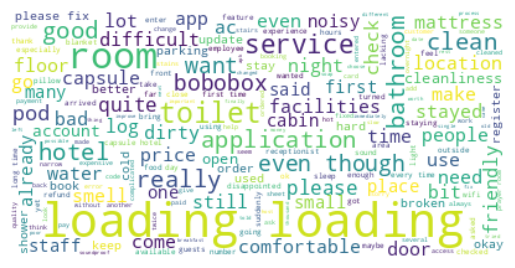

In [36]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Preparing for Machine Learning

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
from sklearn.model_selection import train_test_split

 TfidfVectorizer

In [39]:
tf_idf_vec = TfidfVectorizer()

In [40]:
temp = pd.DataFrame()
temp = pd.DataFrame(tf_idf_vec.fit_transform(df['translated_content']).toarray())
temp.columns = tf_idf_vec.get_feature_names_out()

In [41]:
temp.head(2)

,10,100,12,2nd,30,300,40,able,ac,access,...,worst,worth,would,wrong,years,yes,yesterday,yet,you,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
merged_df = pd.concat([temp, df], axis=1)

In [43]:
merged_df.head(2)

,10,100,12,2nd,30,300,40,able,ac,access,...,wrong,years,yes,yesterday,yet,you,young,translated_content,priority_score,problem_domain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"sorry, including expensive price + apk using e...",2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,app stuck white,3,1


Separation of the data set into training and test

In [44]:
X = merged_df.drop(['problem_domain','translated_content'],axis=1)
y= merged_df['problem_domain']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 661), (140, 661), (560,), (140,))

In [47]:
y_train.value_counts()

,count
problem_domain,
0,454
1,106


Data balancing

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE()

In [50]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [51]:
y_train.value_counts()

,count
problem_domain,
1,454
0,454


Modeling

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Comparison of Accuracy scores of models

In [53]:
lg = LogisticRegression(random_state=13)
rf  = RandomForestClassifier(random_state=13)
gbm = GradientBoostingClassifier(random_state=13)
dt = DecisionTreeClassifier(random_state=13)
xgbm = XGBClassifier(random_state=13)
lgbm = LGBMClassifier(random_state=13, verbose = -1)

In [54]:
model_list = [lg, rf, gbm, dt, xgbm, lgbm]

model_name_list = []
accuracy_list = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for model_name in model_list:

    model = model_name
    model_cv = cross_val_score(model,
                               X_train,
                               y_train,
                               cv=kf,
                               scoring= "accuracy",
                               n_jobs=-1)

    model_name_list.append(model_name.__class__.__name__)
    accuracy_list.append(model_cv.mean())

    print(f"{model_name.__class__.__name__} cross validation accuracy score: {round(model_cv.mean(), 5)}")
    print("-" * 50)

LogisticRegression cross validation accuracy score: 0.85353
--------------------------------------------------
RandomForestClassifier cross validation accuracy score: 0.85793
--------------------------------------------------
GradientBoostingClassifier cross validation accuracy score: 0.84692
--------------------------------------------------
DecisionTreeClassifier cross validation accuracy score: 0.83038
--------------------------------------------------


AttributeError: 'super' object has no attribute '__sklearn_tags__'

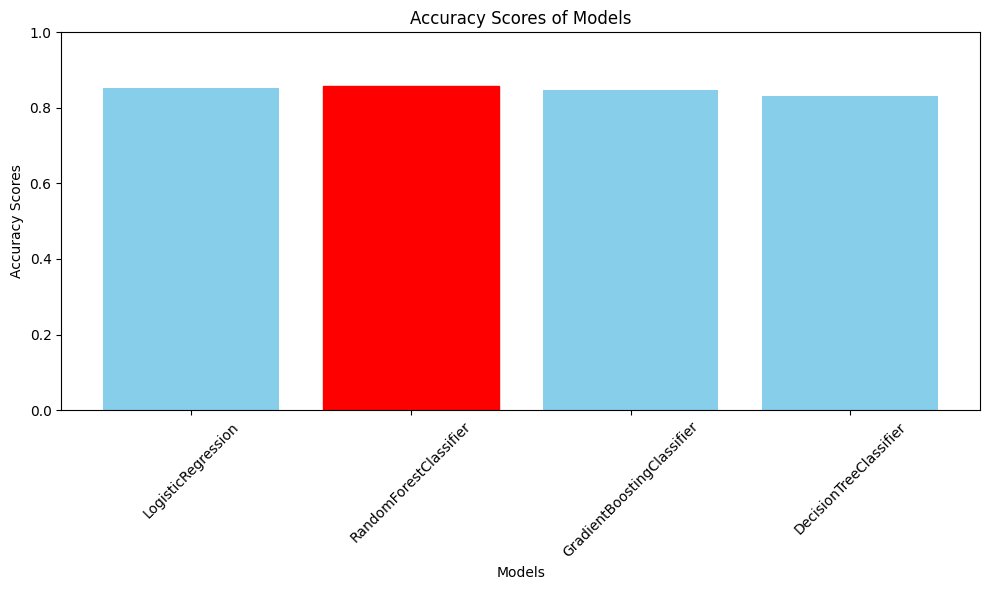

In [55]:
highest_accuracy_score_index = accuracy_list.index(max(accuracy_list))

# Plot oluşturma
plt.figure(figsize=(10, 6))

# Tüm barları aynı renkte çizme
bars = plt.bar(model_name_list, accuracy_list, color='skyblue')

# En yüksek skora sahip olan modelin barını kırmızı renge dönüştürme
bars[highest_accuracy_score_index].set_color('red')

# Eksen ve başlık ayarları
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Görseli gösterme
plt.tight_layout()
plt.show()

In [56]:
rf = rf.fit(X_train, y_train)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       116
           1       0.64      0.67      0.65        24

    accuracy                           0.88       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.88      0.88      0.88       140



In [60]:
accuracy_score(y_test, y_pred)

0.8785714285714286

Text(70.72222222222221, 0.5, 'Real')

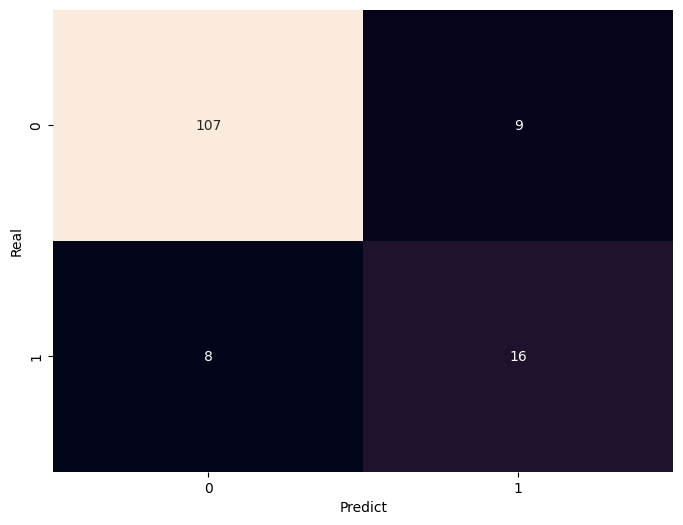

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Real")

Text(70.72222222222221, 0.5, 'Real')

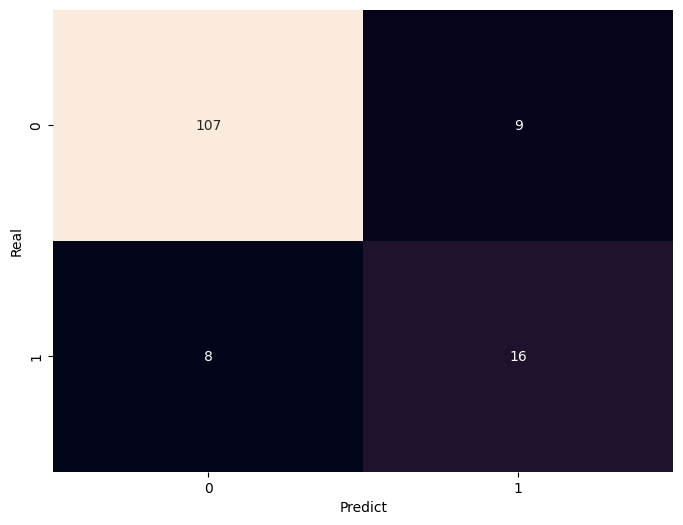

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Real")